### 1. import tensorflow and tensorflow basics

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import tf_utils
import time

np.random.seed(1)

D:\Tools\Anaconda3\envs\tf1\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Tools\Anaconda3\envs\tf1\lib\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Tools\Anaconda3\envs\tf1\lib\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Tools\Anaconda3\envs\tf1\lib\site-packages\tensorflow\python\framework\dtypes.py:522: FutureWa

#### 1.1 Example: Compute loss function

In [4]:
# Use tf.constant to define a constant number
# Ensure values first, then ensure names
y_hat = tf.constant(36,name="y_hat")
y = tf.constant(39,name="y")

# Use tf.Variable to define a variable
# Ensure values first, then ensure names
loss = tf.Variable((y-y_hat)**2,name="loss")

# init
init = tf.global_variables_initializer()

# Create session
with tf.Session() as session:
    session.run(init)
    print(session.run(loss))

9


In [5]:
a = tf.constant(2)
b = tf.constant(10)
c = a * b

print(c)

Tensor("mul:0", shape=(), dtype=int32)


可以发现 c并不是20 而是一个**张量(Tensor)** 

Tensorflow框架将数量和计算过程放置到**计算图(Computation Graph)**中，需要创建一个**会话**以运行计算图

In [6]:
sess = tf.Session()
print(sess.run(c))

20


有时我们事先并不知道一个变量的值，这时就需要**占位符(placeholder)**，需要指定变量的类型

指定占位符的值通过**feed_dict**字典完成，例如：

In [10]:
x = tf.placeholder(tf.int64,name="x")
print(sess.run(2*x,feed_dict={x:3}))

6


#### 1.2 Linear Function

计算线性函数 Y = WX + b 其中W和X为矩阵，b为向量

In [15]:
def linear_function():
    np.random.seed(1)
    X = np.random.randn(3,1)
    W = np.random.randn(4,3)
    b = np.random.randn(4,1)
    
    Y = tf.matmul(W,X) + b
    
    with tf.Session() as sess:
        result = sess.run(Y)
    
    return result

In [16]:
print(linear_function())

[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


#### 1.3 Sigmoid

tensorflow提供了tf.sigmoid运算，需要占位符和feed_dict

In [17]:
def sigmoid(z):
    x = tf.placeholder(tf.float32,name="x")
    
    with tf.Session() as session:
        res = session.run(tf.sigmoid(x),feed_dict={x:z})
    return res

In [18]:
print("sigmoid(0) = "+str(sigmoid(0)))
print("sigmoid(12) = "+str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


#### 1.4 Cost Function

交叉熵代价函数在tensorflow中集成，不需要自己手动编写

#### 1.5 One-hot

在多分类问题中，不同种类的标签可能是0,1,2....我们希望将这种实数标签转化为One-hot型的标签，即构成一个向量，向量中只有一个元素为1.
在Tensorflow中tf.one_hot函数可以完成实数标签到one-hot类型的转换

In [20]:
def one_hot_matrix(labels,C):
    """
    labels:实数标签列表
    C:分类个数
    """
    C = tf.constant(C,name="C")
    
    matrix = tf.one_hot(labels,C,axis=0)
    
    with tf.Session() as session:
        result = session.run(matrix)
    return result

测试：

In [21]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels,4)
print(one_hot)

[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


#### 1.6 初始化
tf.ones()和tf.zeros()分别是初始化全1和全0的矩阵

In [22]:
def ones(shape):
    ones = tf.ones(shape)
    
    with tf.Session() as session:
        res = session.run(ones)
    return res

shape参数是一个包含维度信息的**列表（list）** 比如[3,1]表示一个3x1的向量

In [29]:
print("ones = "+str(ones(([3,1]))))

ones = [[1.]
 [1.]
 [1.]]


### 2. 使用Tensorflow构建NN

加载数据集：

Y = 0


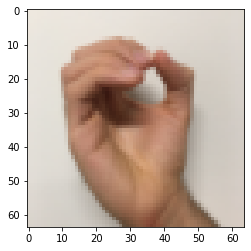

In [3]:
X_train_orig,Y_train_orig,X_test_orig,Y_test_orig,classes = tf_utils.load_dataset()
index = 1
plt.imshow(X_train_orig[index])
print("Y = "+str(np.squeeze(Y_train_orig[:,index])))

数据的向量化、扁平化处理，标签的one_hot处理：

In [6]:
# 向量化
X_train_vec = X_train_orig.reshape(X_train_orig.shape[0],-1).T
X_test_vec = X_test_orig.reshape(X_test_orig.shape[0],-1).T

# 扁平化
X_train = X_train_vec/255
X_test = X_test_vec/255

# one hot
Y_train = tf_utils.convert_to_one_hot(Y_train_orig,6)
Y_test = tf_utils.convert_to_one_hot(Y_test_orig,6)

print("X_train.shape:"+str(X_train.shape))
print("Y_train.shape:"+str(Y_train.shape))
print("X_test.shape:"+str(X_test.shape))
print("Y_test.shape:"+str(Y_test.shape))

X_train.shape:(12288, 1080)
Y_train.shape:(6, 1080)
X_test.shape:(12288, 120)
Y_test.shape:(6, 120)


我们的目的是利用Tensorflow构建一个三层的NN，结构大致如下：
Linear -> Relu -> Linear -> Relu -> linear -> softmax

#### 2.1 为输入X和输出Y构建占位符（placeholder）
tf.placeholder第二个参数用于规定占位符的size，None参数表示该尺度上的大小不确定，所以可以用于灵活处理数据规模。

In [7]:
def create_placeholders(n_x,n_y):
    """
    参数：
        n_x - 一个图片向量的像素数
        n_y - 图片的类型个数
    返回：
        X - 代表训练/测试数据的张量，size为[n_x,None]
        Y - 代表训练/测试标签的张量，size为[n_y,None]
    """
    
    X = tf.placeholder(tf.float32,[n_x,None],name="X")
    Y = tf.placeholder(tf.float32,[n_y,None],name="Y")
    
    return X,Y

测试：

In [8]:
X,Y = create_placeholders(12288,6)
print("X: "+str(X))
print("Y: "+str(Y))

X: Tensor("X:0", shape=(12288, ?), dtype=float32)
Y: Tensor("Y:0", shape=(6, ?), dtype=float32)


#### 2.2  Tensorflow参数初始化
Tensorflow中可以通过tf.get_variable()对参数进行初始化，第一个参数为参数名，第二个参数是参数的size，第三个参数是初始化的方法（W使用Xavier初始化，b使用零初始化）。

注：tf.get_variable()对于没有经过tf.Variable定义的参数也可以使用，即创建变量后指定一个初始化方式

我们先规定每一层的unit数：12288 -> 25 -> 12 -> 6

In [12]:
def init_params():
    """
    返回：
        params - 包含W b参数的字典
    """
    
    tf.set_random_seed(1)
    
    W1 = tf.get_variable("W1",[25,12288],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1",[25,1],initializer=tf.zeros_initializer())
    W2 = tf.get_variable("W2",[12,25],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2",[12,1],initializer=tf.zeros_initializer())
    W3 = tf.get_variable("W3",[6,12],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3",[6,1],initializer=tf.zeros_initializer())
    
    params = {
        "W1":W1,"b1":b1,
        "W2":W2,"b2":b2,
        "W3":W3,"b3":b3
    }
    return params

测试：

In [13]:
tf.reset_default_graph()

with tf.Session() as session:
    params = init_params()
    print("W1 : "+str(params["W1"]))
    print("b1 : "+str(params["b1"]))
    print("W2 : "+str(params["W2"]))
    print("b2 : "+str(params["b2"]))

W1 : <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 : <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 : <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 : <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


#### 2.3 前向传播（Forward Prop）
对于我们之前定义的NN结构而言，在Tensorflow中FP只需要计算到Z3即可，因为tensorflow内置的计算cost function的函数的一个参数就是线性层的输出Z3

In [14]:
def forward_propagation(X,params):
    """
    返回：
        Z3 - 第三层的Linear输出
    """
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    W3 = params["W3"]
    b3 = params["b3"]
    
    Z1 = tf.matmul(W1,X)+b1
    A1 = tf.nn.relu(Z1)
    Z2 = tf.matmul(W2,A1)+b2
    A2 = tf.nn.relu(Z2)
    Z3 = tf.matmul(W3,A2)+b3
    
    return Z3

In [15]:
# 测试
tf.reset_default_graph()
with tf.Session() as session:
    X,Y = create_placeholders(12288,6)
    params = init_params()
    Z3 = forward_propagation(X,params)
    print("Z3 : "+str(Z3))

Z3 : Tensor("add_2:0", shape=(6, ?), dtype=float32)


#### 2.4 Compute Cost

tf.nn.softmax_cross_entropy_with_logits(logits=..., labels==...)内置了softmax的计算和交叉熵函数的计算，所以FP只需要计算到输出层的线性输出即可。
同时需要注意的是，该函数logits和labels的size是[batch_size,n_y]，所以需要将Z3和Y进行转置。

In [20]:
def compute_cost(Z3,Y):
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
    
    return cost

In [22]:
# 测试
tf.reset_default_graph()
with tf.Session() as session:
    X,Y = create_placeholders(12288,6)
    params = init_params()
    Z3 = forward_propagation(X,params)
    cost = compute_cost(Z3,Y)
    print("cost : "+str(cost))

cost : Tensor("Mean:0", shape=(), dtype=float32)


#### 2.5 梯度下降
不需要像之前手动完成后向传播，只需要以下两条语句：

（1）构造optimizer

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

（2）在session中，运行optimizer和cost

 a,minibatchCost = session.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})
 其中第一个返回值是optimizer的评分，通常可以用下划线表示，第二个参数为优化后的cost。
 

#### 2.6 Model

In [34]:
def model(X_train,Y_train,X_test,Y_test,learning_rate=0.001,
         num_epochs=1500,minibatch_size=32,print_cost=True,is_plot=True):
    
    (n_x,m) = X_train.shape
    (n_y,m) = Y_train.shape
    ops.reset_default_graph()
    tf.set_random_seed(1)
    seed = 3
    costs = []
    
    # Construct Computation Graph
    
    # Create placeholders
    X,Y = create_placeholders(n_x,n_y)
    # initialize parameters
    params = init_params()
    # Forward P
    Z3 = forward_propagation(X,params)
    # Compute Cost
    cost = compute_cost(Z3,Y)
    
    # create optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # initialize all parameters
    init = tf.global_variables_initializer()
    
    with tf.Session() as session:
        session.run(init)
        
        for i in range(num_epochs):
            epoch_cost = 0
            num_minibatches = m // minibatch_size
            seed = seed + 1
            minibatches = tf_utils.random_mini_batches(X_train,Y_train,minibatch_size)
            
            for minibatch in minibatches:
                (mini_batch_X,mini_batch_Y) = minibatch
                _,batchCost = session.run([optimizer,cost],feed_dict={X:mini_batch_X,Y:mini_batch_Y})
                epoch_cost = epoch_cost + batchCost/num_minibatches
            if i%5==0:
                costs.append(epoch_cost)
                if print_cost and i%100==0:
                    print("Epoch "+str(i)+" cost:"+str(epoch_cost))
        if is_plot:
            plt.plot(np.squeeze(costs))
            plt.title("learning_rate = "+str(learning_rate))
            plt.xlabel("#Epoch")
            plt.ylabel("Cost")
            plt.show()
        
        # Get parameters
        params = session.run(params)

        # Correct prediction
        correct_prediction = tf.equal(tf.argmax(Z3,axis=0),tf.argmax(Y,axis=0))

        # Accuracy 
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

        print("Training set Accuracy:"+str(accuracy.eval({X:X_train,Y:Y_train})))

        print("Dev set Accuracy:"+str(accuracy.eval({X:X_test,Y:Y_test})))
        #print("Dev set Accuracy:"+str(session.run(accuracy,feed_dict={X:X_test,Y:Y_test})))

    return params

Epoch 0 cost:2.0509920228611334
Epoch 100 cost:0.8120813423937017
Epoch 200 cost:0.502268907698718
Epoch 300 cost:0.5501551203655474
Epoch 400 cost:0.3172829945882161
Epoch 500 cost:0.2395849349823865
Epoch 600 cost:0.21024577500242178
Epoch 700 cost:0.3609322573650968
Epoch 800 cost:0.16447213376787578
Epoch 900 cost:0.17161731958163504
Epoch 1000 cost:0.10966196272409323
Epoch 1100 cost:0.2211866189133037
Epoch 1200 cost:0.025791002084698644
Epoch 1300 cost:0.036872588831818466
Epoch 1400 cost:0.034014826908594725


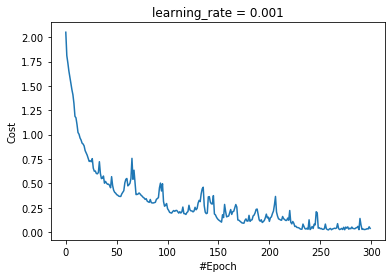

Training set Accuracy:0.9222222
Dev set Accuracy:0.73333335
Execution time:443.7400265329551 s


In [35]:
# start time
start_time = time.clock()
# train
params = model(X_train,Y_train,X_test,Y_test)
# end time 
end_time = time.clock()
print("Execution time:"+str(end_time-start_time)+" s")